# Input =  {r1, r2, b1, a2, RatioTotalArea, frac}
Here we will attempt to elucidate ourselves on how these inputs change eta c. RatioTotalArea will always be an output because it is dependant on the others. 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

Mounted at /content/gdrive


In [ ]:
def single_input_vs_output(dataset, input_column, output_column="eta c", plot=False, output=False):
    reduced_dataset = dataset.drop_duplicates(subset=input_column)
    # data_range = reduced_dataset[input_column].to_numpy()
    if output:
        print("{col} range is: {rng}    (output is {out})".format(col=input_column, rng=len(reduced_dataset), out=output_column))

    if plot:
        ax1 = reduced_dataset.plot.scatter( x=input_column,
                        y=output_column,
                        c='DarkBlue')
        return ax1
        # return sns.scatterplot(data=reduced_dataset, x=input_column, y=output_column)
    
    return reduced_dataset[[input_column, output_column]]

def split_data(dataset):
    train_dataset = dataset.sample(frac=0.6, random_state=0)
    valid_and_test_dataset = dataset.drop(train_dataset.index)
    test_dataset = valid_and_test_dataset.sample(frac=0.5, random_state=0)
    validation_dataset = valid_and_test_dataset.drop(test_dataset.index)
    return train_dataset, test_dataset, validation_dataset

def split_features_labels(data, label_column='eta c'):
    features = data
    labels = data.pop(label_column)
    return features, labels

In [ ]:
uploaded = pd.read_csv("alldata.csv")

dataset = uploaded.copy()
dataset.pop("Unnamed: 0")
dataset = dataset[dataset["eta c"] <= 0.07]

dataset2 = uploaded.copy()
dataset2.pop("Unnamed: 0")
dataset = dataset[dataset["Nc"] > 90]

dataset3 = uploaded.copy()
dataset3.pop("Unnamed: 0")
dataset3 = dataset3[dataset3["eta c"] > 0.07]

# remove irrelevant columns
# dataset.pop("Nc Std. Dev")

# check for missing values
dataset.isna().sum()
# drop missing values
dataset = dataset.dropna()

In [ ]:
dataset2.head()

,r1,2a2,r2,frac,Nc,Nc Std. Dev,eta c,a1,b1,a2,b2,area1,area2,TotalArea,RatioTotalArea
0,1,1.0,1,0.1,1.43561,0.002692,1.12752,0.5,0.5,0.5,0.500000,0.785398,0.785398,1.570796,0.785398
1,1,1.0,1,0.3,1.43786,0.002047,1.12929,0.5,0.5,0.5,0.500000,0.785398,0.785398,1.570796,0.785398
2,1,1.0,2,0.1,1.50315,0.003297,1.12154,0.5,0.5,0.5,0.250000,0.785398,0.392699,1.178097,0.746128
3,1,1.0,2,0.3,1.65310,0.002845,1.10359,0.5,0.5,0.5,0.250000,0.785398,0.392699,1.178097,0.667588
4,1,1.0,3,0.1,1.51915,0.002239,1.11360,0.5,0.5,0.5,0.166667,0.785398,0.261799,1.047198,0.733038


In [ ]:
print("Nc min        :", dataset2["Nc"].min())
print("Nc max        :", dataset2["Nc"].max())
print("Nc ratio      :", dataset2["Nc"].max()/dataset2["Nc"].min())
print("eta c min     :", dataset2["eta c"].min())
print("eta c max     :", dataset2["eta c"].max())
print("eta c ratio   :", dataset2["eta c"].max()/dataset2["eta c"].min())

Nc min        : 1.43506
Nc max        : 300.398
Nc ratio      : 209.32783298259307
eta c min     : 0.00441486
eta c max     : 1.42606
eta c ratio   : 323.0136402966346


In [ ]:
datax = dataset2.copy()
print("RTA min: ", datax["RatioTotalArea"].min())
print("RTA max: ", datax["RatioTotalArea"].max())

RTA min:  3.934452099539521e-05
RTA max:  0.7853981633974483


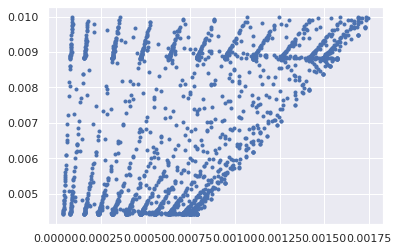

In [ ]:
x = dataset2[dataset2["eta c"] < 0.01]
plt.scatter(x["RatioTotalArea"], x["eta c"], marker='.')

In [ ]:
r1_range = single_input_vs_output(dataset, "r1")
r2_range = single_input_vs_output(dataset, "r2")
frac_range = single_input_vs_output(dataset, "frac")
a1_range = single_input_vs_output(dataset, "a1")
b1_range = single_input_vs_output(dataset, "b1")
a2_range = single_input_vs_output(dataset, "a2")
b2_range = single_input_vs_output(dataset, "b2")
_2a2_range = single_input_vs_output(dataset, "2a2")

b1_range.sort_values('b1', inplace=True)
a2_range.sort_values('a2', inplace=True)
# b2_range.sort_values('b2', inplace=True)

r1_range2 = single_input_vs_output(dataset2, "r1")
r2_range2 = single_input_vs_output(dataset2, "r2")
frac_range2 = single_input_vs_output(dataset2, "frac")
a1_range2 = single_input_vs_output(dataset2, "a1")
b1_range2 = single_input_vs_output(dataset2, "b1")
a2_range2 = single_input_vs_output(dataset2, "a2")
b2_range2 = single_input_vs_output(dataset2, "b2")
_2a2_range2 = single_input_vs_output(dataset2, "2a2")

In [ ]:
print("_______________ Eta C <= 0.07 _______________")
print("Number of samples      {}".format(len(dataset)))
print("% of samples           {}".format(len(dataset)*100/len(dataset2)))
print("b1   number of vals    {}".format(len(b1_range["b1"])))
print("a1   number of vals    {}".format(len(a1_range["a1"])))
print("a2   number of vals    {}".format(len(a2_range["a2"])))
print("b2   number of vals    {}".format(len(b2_range["b2"])))
print("frac number of vals    {}".format(len(frac_range["frac"])))
print("r1   number of vals    {}".format(len(r1_range["r1"])))
print("r2   number of vals    {}".format(len(r2_range["r2"])))
print("Max RatioTotalArea     {}".format(dataset["RatioTotalArea"].max()))
print("Nc range               {x}-{y}".format(x=dataset["Nc"].min(), y=dataset["Nc"].max()))

print()
print("_______________ Eta C < 1.5 _______________")
print("b1   number of vals    {}".format(len(b1_range2["b1"])))
print("a1   number of vals    {}".format(len(a1_range2["a1"])))
print("a2   number of vals    {}".format(len(a2_range2["a2"])))
print("b2   number of vals    {}".format(len(b2_range2["b2"])))
print("frac number of vals    {}".format(len(frac_range2["frac"])))
print("r1   number of vals    {}".format(len(r1_range2["r1"])))
print("r2   number of vals    {}".format(len(r2_range2["r2"])))
print("Max RatioTotalArea     {}".format(dataset2["RatioTotalArea"].max()))

_______________ Eta C <= 0.07 _______________
Number of samples      9888
% of samples           17.0951401255165
b1   number of vals    20
a1   number of vals    1
a2   number of vals    13
b2   number of vals    122
frac number of vals    12
r1   number of vals    20
r2   number of vals    20
Max RatioTotalArea     0.012880529879718152
Nc range               5.408530000000002-112.584

_______________ Eta C < 1.5 _______________
b1   number of vals    20
a1   number of vals    1
a2   number of vals    13
b2   number of vals    129
frac number of vals    12
r1   number of vals    20
r2   number of vals    20
Max RatioTotalArea     0.7853981633974483


From this we can see that almost every value of every feature is present. More notably, every value of every input feature is present (b1,a2,b2,frac) while RTA is kept low.

In [ ]:
r1values = r1_range.sort_values("r1")["r1"]
r2values = r2_range.sort_values("r2")["r2"]
b1values = b1_range.sort_values("b1")["b1"].round(decimals=4)
a2values = a2_range.sort_values("a2")["a2"]
# b2values = b2_range.sort_values("b2")["b2"]#.round(decimals=10)

print("r1 range {}".format(list(r1values)))
print("r2 range {}".format(list(r2values)))
print("b1 range {}".format(list(b1values)))
print("a2 range {}".format(list(a2values)))
# print("b2 range {}".format(list(b2values)))

r1 range [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 80.0, 100.0, 200.0, 500.0, 1000.0]
r2 range [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 80.0, 100.0, 200.0, 500.0, 1000.0]
b1 range [0.0005, 0.001, 0.0025, 0.005, 0.0062, 0.01, 0.0125, 0.0167, 0.025, 0.0333, 0.05, 0.0556, 0.0625, 0.0714, 0.0833, 0.1, 0.125, 0.1667, 0.25, 0.5]
a2 range [0.005, 0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]


In [ ]:
a2values = list(a2_range.sort_values("a2", ascending=False)["a2"])
a2values

[0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.025, 0.01, 0.005]

Using r1 (and a1 as 1), a2 and r2 and frac, can calc RTA. 
RTA = (1-f)(1/r1) + (f)[(a2^2)/r2]. But first, let us see which data values are present.

Text(0.5, 1.0, 'Eta c > 0.07')

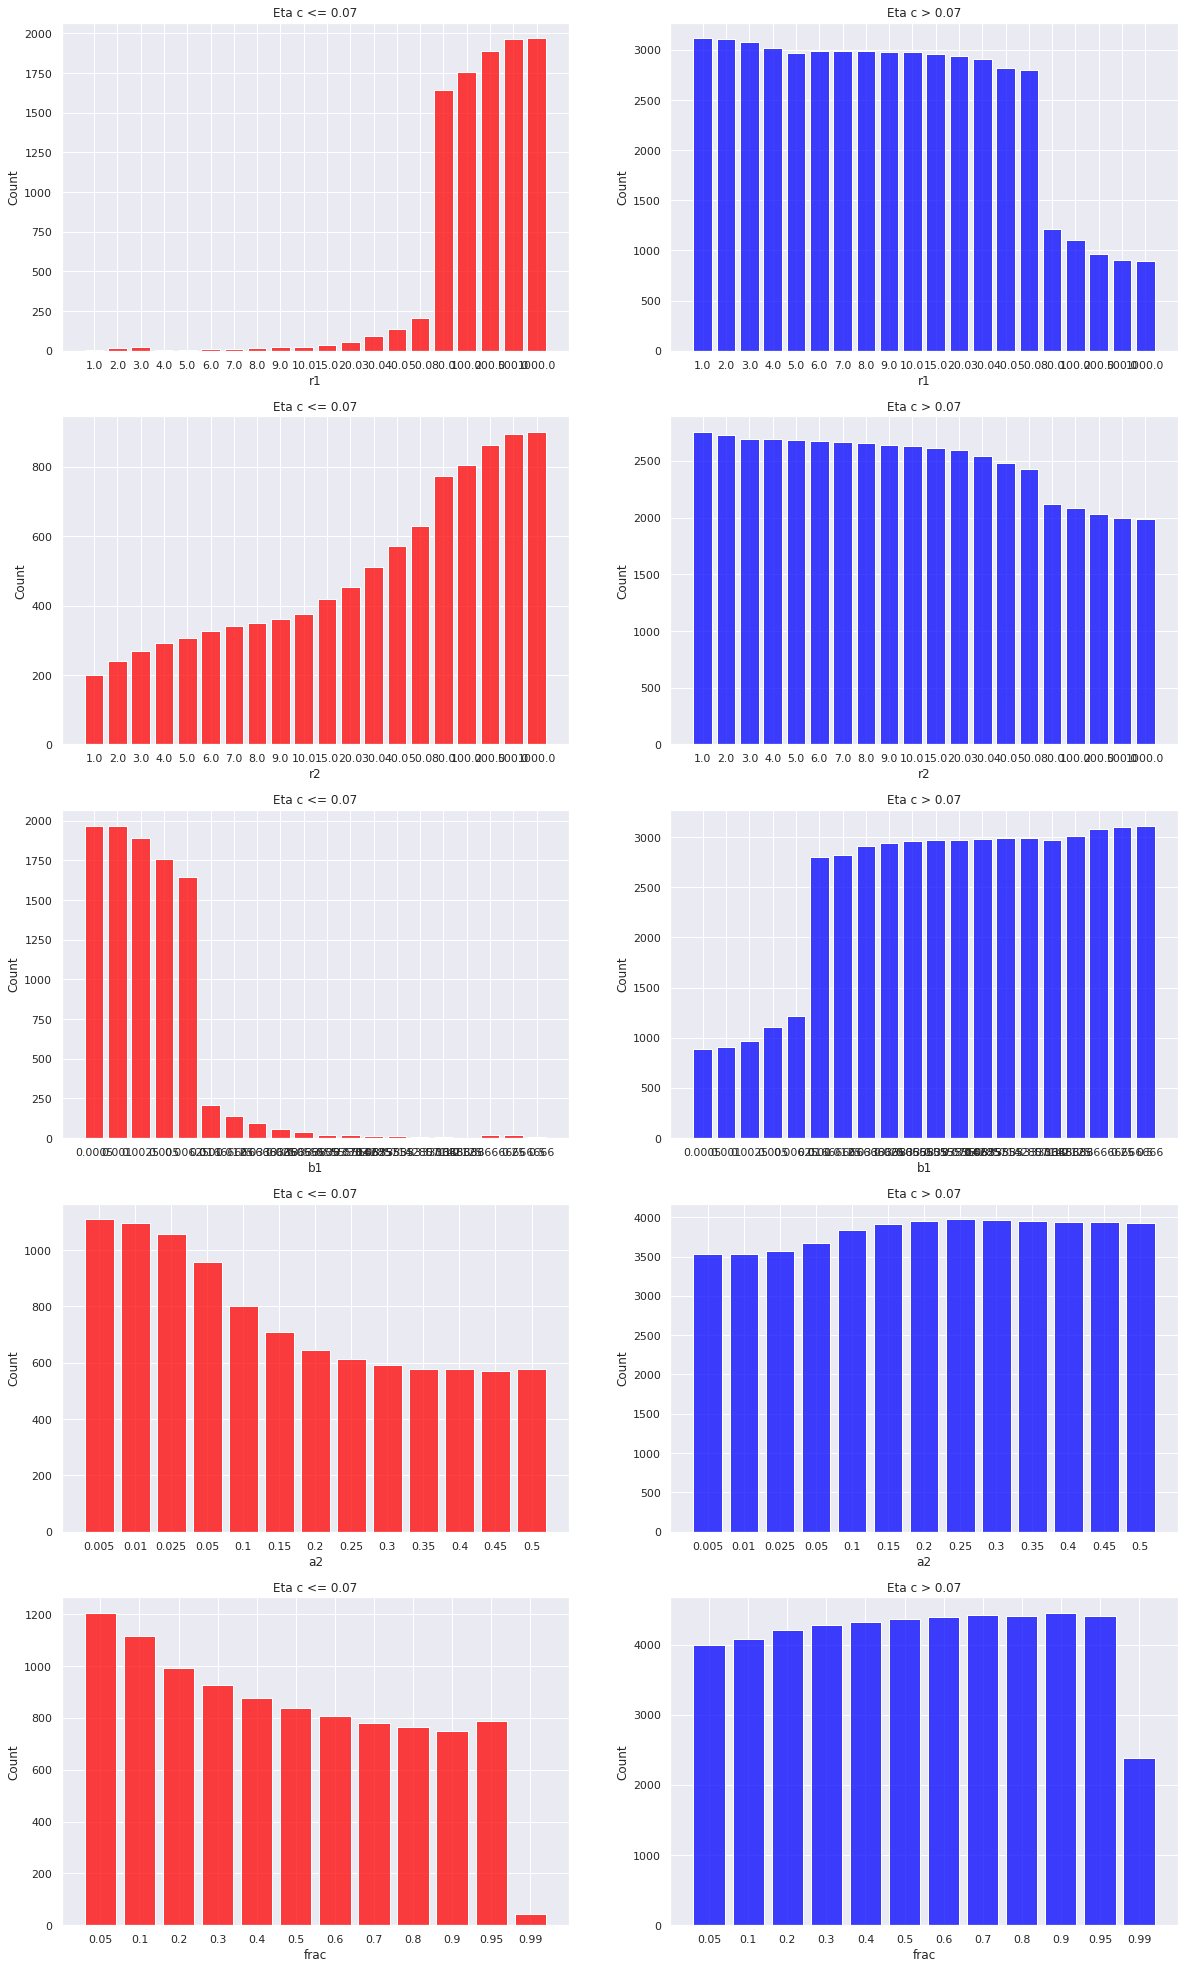

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20,35))

catagorical_dataset = dataset.sort_values("r1").copy()
catagorical_dataset['r1'] = catagorical_dataset['r1'].astype(str)
sns.histplot(catagorical_dataset, x="r1", shrink=.8, color='red', ax=axs[0][0], label="r1")
catagorical_dataset = dataset3.sort_values("r1").copy()
catagorical_dataset['r1'] = catagorical_dataset['r1'].astype(str)
sns.histplot(catagorical_dataset, x="r1", shrink=.8, color='blue', ax=axs[0][1])

catagorical_dataset = dataset.sort_values("r2").copy()
catagorical_dataset['r2'] = catagorical_dataset['r2'].astype(str)
sns.histplot(catagorical_dataset, x="r2", shrink=.8, color='red', ax=axs[1][0])
catagorical_dataset = dataset3.sort_values("r2").copy()
catagorical_dataset['r2'] = catagorical_dataset['r2'].astype(str)
sns.histplot(catagorical_dataset, x="r2", shrink=.8, color='blue', ax=axs[1][1])

catagorical_dataset = dataset.sort_values("b1").copy()
catagorical_dataset['b1'] = catagorical_dataset['b1'].astype(str)
sns.histplot(catagorical_dataset, x="b1", shrink=.8, color='red', ax=axs[2][0])
catagorical_dataset = dataset3.sort_values("b1").copy()
catagorical_dataset['b1'] = catagorical_dataset['b1'].astype(str)
sns.histplot(catagorical_dataset, x="b1", shrink=.8, color='blue', ax=axs[2][1])

catagorical_dataset = dataset.sort_values("a2").copy()
catagorical_dataset['a2'] = catagorical_dataset['a2'].astype(str)
sns.histplot(catagorical_dataset, x="a2", shrink=.8, color='red', ax=axs[3][0])
catagorical_dataset = dataset3.sort_values("a2").copy()
catagorical_dataset['a2'] = catagorical_dataset['a2'].astype(str)
sns.histplot(catagorical_dataset, x="a2", shrink=.8, color='blue', ax=axs[3][1])

catagorical_dataset = dataset.sort_values("frac").copy()
catagorical_dataset['frac'] = catagorical_dataset['frac'].astype(str)
sns.histplot(catagorical_dataset, x="frac", shrink=.8, color='red', ax=axs[4][0])
catagorical_dataset = dataset3.sort_values("frac").copy()
catagorical_dataset['frac'] = catagorical_dataset['frac'].astype(str)
sns.histplot(catagorical_dataset, x="frac", shrink=.8, color='blue', ax=axs[4][1])

axs[0][0].set_title("Eta c <= 0.07")
axs[0][1].set_title("Eta c > 0.07")
axs[1][0].set_title("Eta c <= 0.07")
axs[1][1].set_title("Eta c > 0.07")
axs[2][0].set_title("Eta c <= 0.07")
axs[2][1].set_title("Eta c > 0.07")
axs[3][0].set_title("Eta c <= 0.07")
axs[3][1].set_title("Eta c > 0.07")
axs[4][0].set_title("Eta c <= 0.07")
axs[4][1].set_title("Eta c > 0.07")

This shows we shoud get data for r1<80 and r2>80, focusing on the former. Higher fracs are also a possibility but not so pertinent. This means, 1 frac from each for each combintation of r1 and r2. There are about 15 r1 and r2 values -> 225 combinations. With 10-11 frac values this will be 2250 to 2500 values. Of this, we choose those with eta c < 0.013- if there are any. 

There will be 3 loops r1, r2 and frac. We will calc what a2 must be less than. Here we choose a frac, then choose a r1 then for all r2's calc a2. Then do that for each r1 then both for each frac.

In [ ]:
r1_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]
r2_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]
f_range = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
# a2_range = []
RTA_max = 0.0130
names = ['frac', 'r1', 'r2', 'a2<=']
temp = [[0,0,0,0]]
new_sample_points = pd.DataFrame(temp, columns=names)

for i in range(0, len(f_range)):
  # a2 loop
  f = f_range[i]

  for ii in range(0, len(r1_range)):
    # r1 loop
    r1 = r1_range[ii]

    for iii in range(0, len(r2_range)):
      # r2 loop
      r2 = r2_range[iii]

      x = RTA_max-(1-f)*(1/r1)
      if x>0:
        y = x*(r2/f)
        a2 = np.sqrt(y)
        # a2_range.append(a2)
        row = [f, r1, r2, a2]

        new_sample_points.loc[len(new_sample_points)] = row

# remove starting row
new_sample_points = new_sample_points[new_sample_points.index > 0]
new_sample_points.reset_index(drop=True, inplace=True)
print("Number of new samples:", len(new_sample_points))

Number of new samples: 705


a2 range [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.025, 0.01, 0.005]


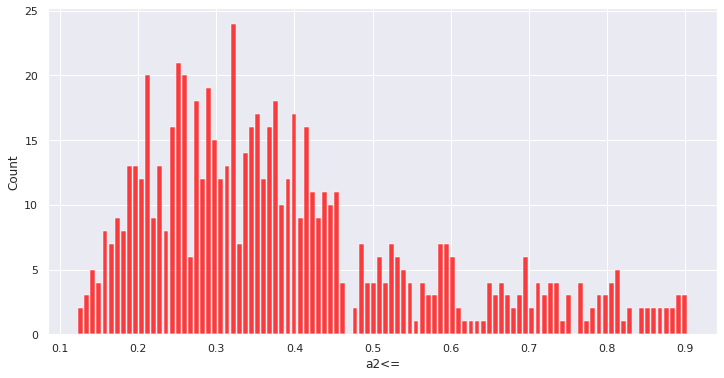

In [ ]:
print("a2 range {}".format(a2values))

a2_range = new_sample_points["a2<="]
fig, axs = plt.subplots(figsize=(12,6))
sns.histplot(a2_range, shrink=.8, color='red', bins=100)

In [ ]:
temp = new_sample_points.copy()
names = ['frac', 'r1', 'r2', 'a2']
df = pd.DataFrame(columns=names)

print("a2 range {}".format(a2values))
for i in range(0, len(temp)):
  a2 = float(temp.loc[i, "a2<="])
  for ii in range(0, len(a2values)):
    if a2values[ii] <= a2:
      temp.loc[i, "a2<="] = a2values[ii]
      working_a2 = a2values[ii:]
      working_a2_vec = np.reshape(np.ones((1, len(working_a2)))*working_a2, (-1,1))

      x = np.array(temp.loc[i, ["frac", "r1", "r2"]])
      other_inputs = np.ones((len(working_a2),3))*np.reshape(x,(1,-1))

      all_inputs = np.append(other_inputs, working_a2_vec, axis=1)
      df_temp = pd.DataFrame(all_inputs, columns=names)
      df = df.append(df_temp)
      empty = False
      break


a2 range [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.025, 0.01, 0.005]


In [ ]:
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(inplace=True)

new_data = df.copy()

new_data["a1"]=1/2
new_data["b1"]=new_data["a1"]/new_data["r1"]
new_data["2a2"]=new_data["a2"]*2
new_data["b2"]=new_data["a2"]/new_data["r2"]
new_data["area1"]=new_data["a1"]*new_data["b1"]*np.pi
new_data["area2"]=new_data["a2"]*new_data["b2"]*np.pi
new_data["TotalArea"] = new_data["area1"] + new_data["area2"]
new_data["RatioTotalArea"] = new_data["area1"]*(1-new_data["frac"]) + new_data["area2"]*(new_data["frac"])
new_data.head()

# save new inputs WITHOUT LABELS to csv - not used
# new_data.to_csv("NewDataPoints.csv")

,frac,r1,r2,a2,a1,b1,2a2,b2,area1,area2,TotalArea,RatioTotalArea
0,0.4,50.0,1.0,0.025,0.5,0.01,0.05,0.0250,0.015708,0.001963,0.017671,0.010210
1,0.4,50.0,1.0,0.010,0.5,0.01,0.02,0.0100,0.015708,0.000314,0.016022,0.009550
2,0.4,50.0,1.0,0.005,0.5,0.01,0.01,0.0050,0.015708,0.000079,0.015787,0.009456
3,0.4,50.0,2.0,0.050,0.5,0.01,0.10,0.0250,0.015708,0.003927,0.019635,0.010996
4,0.4,50.0,2.0,0.025,0.5,0.01,0.05,0.0125,0.015708,0.000982,0.016690,0.009817


In [ ]:
original_data = dataset2[["r1", "r2", "a2", "frac"]].copy()
new_sample_inputs = new_data[["r1", "r2", "a2", "frac"]].copy()

In [ ]:
len(new_sample_inputs)

5637

In [ ]:
new_temp_df = pd.concat([original_data, new_sample_inputs])
new_temp_df = new_temp_df.reset_index(drop=True)

df_gpby = df.groupby(list(df.columns))

idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]

new_temp_df.reindex(idx)

,r1,r2,a2,frac
2,1.0,2.0,0.500,0.10
1,1.0,1.0,0.500,0.30
0,1.0,1.0,0.500,0.10
6,1.0,4.0,0.500,0.10
5,1.0,3.0,0.500,0.30
...,...,...,...,...
5628,6.0,8.0,0.300,0.30
5627,6.0,500.0,0.050,0.05
5626,6.0,7.0,0.300,0.30
5625,6.0,200.0,0.005,0.20


In [ ]:
len(new_data)

5637

Now we need to check if we actually added more new samples compared to the orginial dataset or not. We can do this by comparing histplots.  

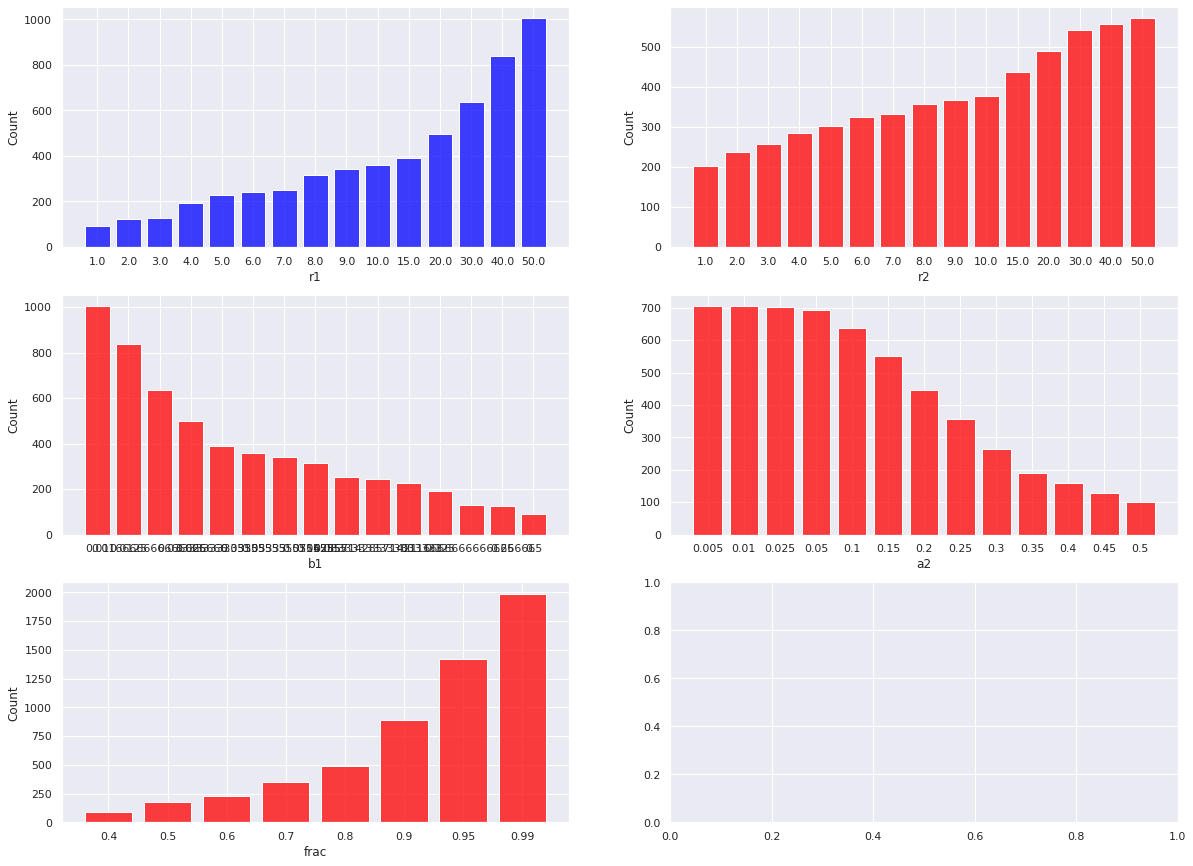

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

catagorical_dataset = new_data.sort_values("r1").copy()
catagorical_dataset['r1'] = catagorical_dataset['r1'].astype(str)
sns.histplot(catagorical_dataset, x="r1", shrink=.8, color='blue', ax=axs[0][0])

catagorical_dataset = new_data.sort_values("r2").copy()
catagorical_dataset['r2'] = catagorical_dataset['r2'].astype(str)
sns.histplot(catagorical_dataset, x="r2", shrink=.8, color='red', ax=axs[0][1])

catagorical_dataset = new_data.sort_values("b1").copy()
catagorical_dataset['b1'] = catagorical_dataset['b1'].astype(str)
sns.histplot(catagorical_dataset, x="b1", shrink=.8, color='red', ax=axs[1][0])

catagorical_dataset = new_data.sort_values("a2").copy()
catagorical_dataset['a2'] = catagorical_dataset['a2'].astype(str)
sns.histplot(catagorical_dataset, x="a2", shrink=.8, color='red', ax=axs[1][1])

catagorical_dataset = new_data.sort_values("frac").copy()
catagorical_dataset['frac'] = catagorical_dataset['frac'].astype(str)
sns.histplot(catagorical_dataset, x="frac", shrink=.8, color='red', ax=axs[2][0])

It can be seen from the above 2 plots, that new samples are added. Frac is limited to > 0.4. There is almost 1000 samples for r1 = 50, which is ~750 more than what the orginial data set has. The groupby code run earlier also indicates that all 5637 are new and unique to the sample space. 

Actually, a better way to view this (duplicates) would be to take the orginial data and drop all duplicates and check the number of samples. Then append the new ones, and do the same. 

In [ ]:
original_data = dataset2[["r1", "r2", "2a2", "frac"]].copy()
new_sample_inputs = new_data[["r1", "r2", "2a2", "frac"]].copy()

print("# of ORIGINAL samples                :", len(original_data))
print("# of ORIGINAL samples W/O DUPLICATES :", len(original_data.drop_duplicates()))
print("# of NEW samples                     :", len(new_sample_inputs))
print("# of NEW samples W/O DUPLICATES      :", len(new_sample_inputs.drop_duplicates()))

# of ORIGINAL samples                : 57841
# of ORIGINAL samples W/O DUPLICATES : 57831
# of NEW samples                     : 5637
# of NEW samples W/O DUPLICATES      : 5637


This shows that neither set has duplicates. If adding the new samples to the old does not result in a perfect sum of the number of samples, there are new samples already present in the old data.

In [ ]:
all_data = original_data.append(new_sample_inputs)

print("# of ALL samples                :", len(all_data))
print("# of ALL samples W/O DUPLICATES :", len(all_data.drop_duplicates()))
print("Should be                       :", len(original_data)+len(new_sample_inputs))
print("# of REAL NEW samples           :", len(all_data.drop_duplicates())-len(original_data))

# of ALL samples                : 63478
# of ALL samples W/O DUPLICATES : 59577
Should be                       : 63478
# of REAL NEW samples           : 1736


Below shows the index where the new data is added to the old. Thus, cutting from this index would give the real new samples. The drop_duplicates keeps the first instance. Since there was no change in the original dataset, it can be assumed there are no duplicates in it. Thus, all remaining 1736 samples after the 57840th is unique.

In [ ]:
all_data[57837:57845]

,r1,r2,2a2,frac
57837,50.0,100.0,1.00,0.95
57838,50.0,200.0,1.00,0.95
57839,50.0,500.0,1.00,0.95
57840,50.0,1000.0,1.00,0.95
0,50.0,1.0,0.05,0.40
1,50.0,1.0,0.02,0.40
2,50.0,1.0,0.01,0.40
3,50.0,2.0,0.10,0.40


In [ ]:
all_unique_samples = all_data.drop_duplicates()
new_unique_samples = all_unique_samples[len(dataset2):]
new_unique_samples = new_unique_samples.reset_index()
new_unique_samples.pop("index")
print(len(all_unique_samples))
print(len(new_unique_samples))

59577
1736


We can check this by checking the duplicates in this new data with the old data like before. 

In [ ]:
print("# of ORIGINAL samples                :", len(original_data))
print("# of ORIGINAL samples W/O DUPLICATES :", len(original_data.drop_duplicates()))
print("# of NEW samples                     :", len(new_unique_samples))
print("# of NEW samples W/O DUPLICATES      :", len(new_unique_samples.drop_duplicates()))
print()
all_unique_data = original_data.append(new_unique_samples)

print("# of ALL samples                :", len(all_unique_data))
print("# of ALL samples W/O DUPLICATES :", len(all_unique_data.drop_duplicates()))
print("Should be                       :", len(original_data)+len(new_unique_samples))
print("# of REAL NEW samples           :", len(all_unique_data.drop_duplicates())-len(original_data))

# of ORIGINAL samples                : 57841
# of ORIGINAL samples W/O DUPLICATES : 57831
# of NEW samples                     : 1736
# of NEW samples W/O DUPLICATES      : 1736

# of ALL samples                : 59577
# of ALL samples W/O DUPLICATES : 59567
Should be                       : 59577
# of REAL NEW samples           : 1726


In [ ]:
len(new_unique_samples)

1736

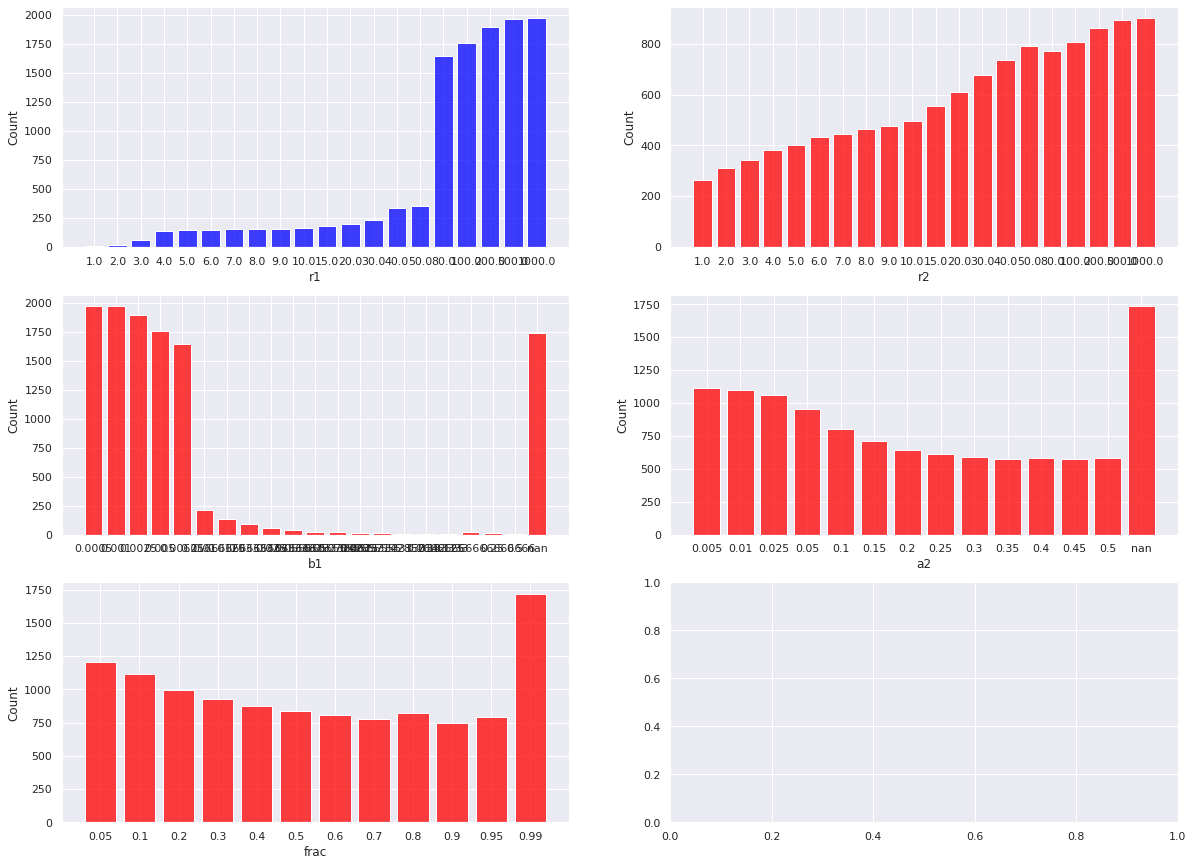

In [ ]:
new_data = new_unique_samples.copy()
new_data = new_data.append(dataset)

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

catagorical_dataset = new_data.sort_values("r1").copy()
catagorical_dataset['r1'] = catagorical_dataset['r1'].astype(str)
sns.histplot(catagorical_dataset, x="r1", shrink=.8, color='blue', ax=axs[0][0])

catagorical_dataset = new_data.sort_values("r2").copy()
catagorical_dataset['r2'] = catagorical_dataset['r2'].astype(str)
sns.histplot(catagorical_dataset, x="r2", shrink=.8, color='red', ax=axs[0][1])

catagorical_dataset = new_data.sort_values("b1").copy()
catagorical_dataset['b1'] = catagorical_dataset['b1'].astype(str)
sns.histplot(catagorical_dataset, x="b1", shrink=.8, color='red', ax=axs[1][0])

catagorical_dataset = new_data.sort_values("a2").copy()
catagorical_dataset['a2'] = catagorical_dataset['a2'].astype(str)
sns.histplot(catagorical_dataset, x="a2", shrink=.8, color='red', ax=axs[1][1])

catagorical_dataset = new_data.sort_values("frac").copy()
catagorical_dataset['frac'] = catagorical_dataset['frac'].astype(str)
sns.histplot(catagorical_dataset, x="frac", shrink=.8, color='red', ax=axs[2][0])